# Multi Linear Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("Fish.csv")

In [3]:
dataset.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [4]:
dataset.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [5]:
dataset["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
dataset["Species"] = le.fit_transform(dataset["Species"])

In [8]:
dataset["Species"].unique()

array([0, 4, 6, 1, 2, 3, 5], dtype=int64)

In [9]:
x = dataset.iloc[:,2:7].values
y = dataset.iloc[:,1].values
z = dataset.iloc[:,0].values
x.shape

(159, 5)

In [10]:
y

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [11]:
x

array([[23.2   , 25.4   , 30.    , 11.52  ,  4.02  ],
       [24.    , 26.3   , 31.2   , 12.48  ,  4.3056],
       [23.9   , 26.5   , 31.1   , 12.3778,  4.6961],
       [26.3   , 29.    , 33.5   , 12.73  ,  4.4555],
       [26.5   , 29.    , 34.    , 12.444 ,  5.134 ],
       [26.8   , 29.7   , 34.7   , 13.6024,  4.9274],
       [26.8   , 29.7   , 34.5   , 14.1795,  5.2785],
       [27.6   , 30.    , 35.    , 12.67  ,  4.69  ],
       [27.6   , 30.    , 35.1   , 14.0049,  4.8438],
       [28.5   , 30.7   , 36.2   , 14.2266,  4.9594],
       [28.4   , 31.    , 36.2   , 14.2628,  5.1042],
       [28.7   , 31.    , 36.2   , 14.3714,  4.8146],
       [29.1   , 31.5   , 36.4   , 13.7592,  4.368 ],
       [29.5   , 32.    , 37.3   , 13.9129,  5.0728],
       [29.4   , 32.    , 37.2   , 14.9544,  5.1708],
       [29.4   , 32.    , 37.2   , 15.438 ,  5.58  ],
       [30.4   , 33.    , 38.3   , 14.8604,  5.2854],
       [30.4   , 33.    , 38.5   , 14.938 ,  5.1975],
       [30.9   , 33.5   , 38

In [12]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

In [13]:
z = one.fit_transform(z.reshape(-1,1)).toarray()

C:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [14]:

x.shape

(159, 5)

In [15]:
x = np.concatenate((z,x),axis=1)

In [16]:
z

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [17]:
z.shape

(159, 7)

In [18]:
x

array([[ 1.    ,  0.    ,  0.    , ..., 30.    , 11.52  ,  4.02  ],
       [ 1.    ,  0.    ,  0.    , ..., 31.2   , 12.48  ,  4.3056],
       [ 1.    ,  0.    ,  0.    , ..., 31.1   , 12.3778,  4.6961],
       ...,
       [ 0.    ,  0.    ,  0.    , ..., 13.8   ,  2.277 ,  1.2558],
       [ 0.    ,  0.    ,  0.    , ..., 15.2   ,  2.8728,  2.0672],
       [ 0.    ,  0.    ,  0.    , ..., 16.2   ,  2.9322,  1.8792]])

In [19]:
x.shape

(159, 12)

In [20]:
y[0:10]

array([242., 290., 340., 363., 430., 450., 500., 390., 450., 500.])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
x_train.shape

(127, 12)

In [23]:
x_test.shape

(32, 12)

In [24]:
y_train.shape

(127,)

In [25]:
y_test.shape

(32,)

In [26]:
from sklearn.linear_model import LinearRegression
mlr  = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred = mlr.predict(x_test)

In [28]:
y_pred

array([ 428.88533577,   98.08363614,  216.67998922,  208.66936638,
        657.24094116,  876.38855413,  665.97861965,  407.27203048,
        965.65306863,  146.62291102,  255.15532231,  561.63685124,
        765.67575361, 1012.38234027, -118.72798063,   14.47341216,
        137.60789564, 1155.53572308,  170.97092949,  724.93548455,
       -128.48675188,  525.45508599,  175.3519065 , 1322.74816983,
        -23.0873263 ,  475.44172778,  719.96841977,  280.94571114,
        885.12085107,  -16.63412226,  585.26038657,  164.22863371])

In [29]:
y_test

array([ 390. ,    0. ,  170. ,  160. ,  556. ,  900. ,  800. ,  300. ,
        975. ,  115. ,  200. ,  456. , 1000. , 1000. ,   60. ,   78. ,
        145. , 1600. ,  130. ,  720. ,   55. ,  390. ,  120. , 1650. ,
         90. ,  450. ,  700. ,  270. ,  850. ,    9.7,  650. ,  110. ])

In [30]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)

In [31]:
accuracy

0.910235031620258

# Linear Regression

In [32]:
dataset = pd.read_csv("data.csv")

In [33]:
dataset.head(10)

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


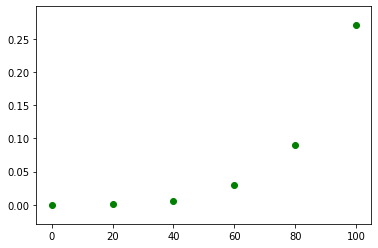

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dataset['Temperature'],dataset['Pressure'],color = "green")

In [35]:
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2:3].values

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred =  lr.predict(x)

In [38]:
x

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]], dtype=int64)

In [39]:
y

array([[2.0e-04],
       [1.2e-03],
       [6.0e-03],
       [3.0e-02],
       [9.0e-02],
       [2.7e-01]])

In [40]:
y_pred

array([[-0.05086667],
       [-0.00402667],
       [ 0.04281333],
       [ 0.08965333],
       [ 0.13649333],
       [ 0.18333333]])

In [41]:
from sklearn.metrics import r2_score
accuracy = r2_score(y,y_pred)

In [42]:
accuracy

0.690349972603981

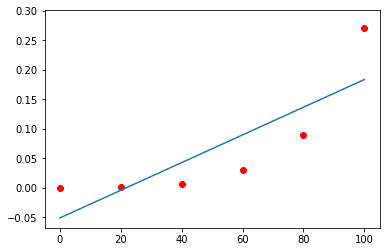

In [43]:
plt.scatter(x,y, color ='red')
plt.plot(x,lr.predict(x))

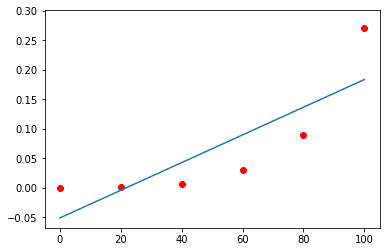

In [44]:
plt.scatter(x,y, color ='red')
plt.plot(x,y_pred)

# Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=8)
x_poly = poly_reg.fit_transform(x)
#x_poly_test = poly_reg.fit_transform(x_test)

In [46]:
poly_reg.fit(x_poly,y)
#poly_reg.fit(x_poly_train,y_test)

PolynomialFeatures(degree=8, include_bias=True, interaction_only=False,
                   order='C')

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_poly_pred = lin_reg.predict(x_poly)

In [49]:
y

array([[2.0e-04],
       [1.2e-03],
       [6.0e-03],
       [3.0e-02],
       [9.0e-02],
       [2.7e-01]])

In [50]:
y_poly_pred

array([[2.0e-04],
       [1.2e-03],
       [6.0e-03],
       [3.0e-02],
       [9.0e-02],
       [2.7e-01]])

In [51]:
accuracy_poly = r2_score(y,y_poly_pred)

In [52]:
accuracy_poly

1.0

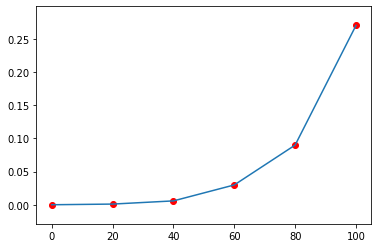

In [53]:
plt.scatter(x,y,color = 'red')
plt.plot(x,y_poly_pred)